<a href="https://colab.research.google.com/github/souhirbenamor/CBR-FRD/blob/main/LSTM_Model_Bridging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/dhamvi01/Multivariate-Time-Series-Using-LSTM/blob/master/Multivariate.ipynb

In [162]:
import pandas as pd
import os

In [ ]:
os.getcwd()

'/content'

In [161]:
# fix random seed for reproducibility
import numpy as np
import pandas as pd
# load dataset
df = pd.read_excel('/content/electricty_real&Funda&al_data_selected.xlsx', skipfooter=3)
df['Date'] = pd.to_datetime(df['Date'])

#df = df.sort_values(df['Date'], ascending=[True])


df.set_index(df['Date'], inplace = True)
df.drop(columns = [ 'Date'], inplace = True)
df.head()

,price day ahead real,Estimated price,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,,,
2014-12-31 23:59:59.991,18.2900,25.3903,40242.2500,8280.0000,0.0000,21.3000,55.1700,7.2700
2015-01-01 00:59:59.991,16.0400,24.9800,39158.5000,8412.7500,0.0000,21.3000,55.1700,7.2700
2015-01-01 01:59:59.991,14.6000,24.7969,38824.5000,8502.2500,0.0000,21.3000,55.1700,7.2700
2015-01-01 02:59:59.991,14.9500,26.0744,38969.2500,8668.5000,0.0000,21.3000,55.1700,7.2700
2015-01-01 03:59:59.991,14.5000,20.3780,39092.7500,8849.2500,0.0000,21.3000,55.1700,7.2700


In [163]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
#df = pd.read_csv('/winequality-red.csv') # Load the data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
Y = df['price day ahead real']
X =  df[['Estimated price ', 'Demand DE', 'Wind', 'PV', 'Gas', 'Coal', 'CO2']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

[0.90328823 0.01604551 0.04437967 0.00366575 0.00767563 0.00719
 0.01775521]


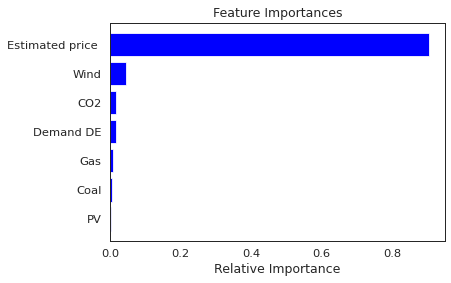

In [164]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_excel('/content/electricty_real&Funda&al_data_selected.xlsx')

In [ ]:
print('Number of rows and columns:', df.shape)

Number of rows and columns: (52608, 9)


In [ ]:
df = df.dropna(subset=['price day ahead real'])

In [ ]:
stat, p = stats.normaltest(df['price day ahead real'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=6976.233, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 5.762462729346835
Skewness of normal distribution: -0.2580739960017801


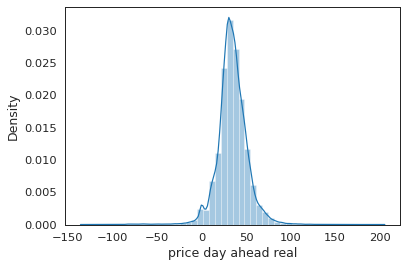

In [ ]:
sns.distplot(df['price day ahead real']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df['price day ahead real'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df['price day ahead real'])))

,count,mean,std,min,25%,50%,75%,max
price day ahead real,52608.0000,34.5637,16.6085,-130.0900,25.9200,34.0200,43.5900,200.0400
Estimated price,52608.0000,36.7264,11.7584,-20.0000,29.2600,35.4750,43.5382,147.6260
Demand DE,52608.0000,56143.3162,9994.9839,29203.5000,47793.1071,55896.6927,64813.5625,77804.4046
Wind,52608.0000,11660.9252,9053.4572,313.5000,4626.3750,9101.1250,16318.2500,47230.7500
PV,52608.0000,4474.0381,6851.5172,0.0000,0.0000,169.2500,7090.4375,32478.5000
Gas,52608.0000,16.2575,4.9416,3.5100,12.9425,16.1800,19.8500,29.2400
Coal,52608.0000,59.4055,14.9284,34.6700,46.8025,53.9200,72.9200,88.0800
CO2,52608.0000,14.0773,8.7519,3.9300,6.0775,8.5800,23.5400,33.2900


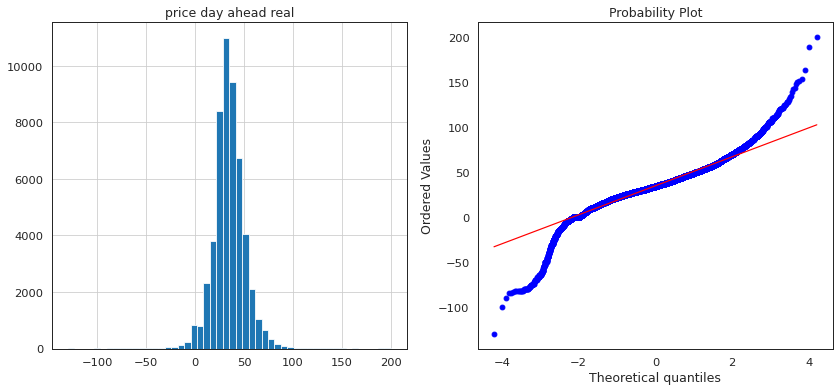

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['price day ahead real'].hist(bins=50)
plt.title('price day ahead real')
plt.subplot(1,2,2)
stats.probplot(df['price day ahead real'], plot=plt);
df.describe().T

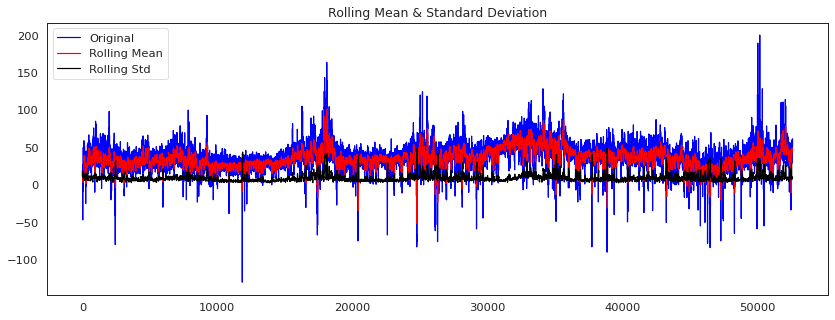

<Results of Dickey-Fuller Test>
Test Statistic                  -16.5334
p-value                           0.0000
#Lags Used                       58.0000
Number of Observations Used   52549.0000
Critical Value (1%)              -3.4305
Critical Value (5%)              -2.8616
Critical Value (10%)             -2.5668
dtype: float64


In [ ]:


def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df['price day ahead real'].dropna())

In [ ]:
dataset = df['price day ahead real'].values #numpy.ndarray

dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20


StagingError: ignored

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 3.047293949943327
Train Root Mean Squared Error: 4.65345388941071
Test Mean Absolute Error: 3.195880756442112
Test Root Mean Squared Error: 5.023599237961262


In [ ]:
!conda install -c conda-forge shap

/bin/bash: conda: command not found


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, X_train)

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(X_train)

AttributeError: ignored

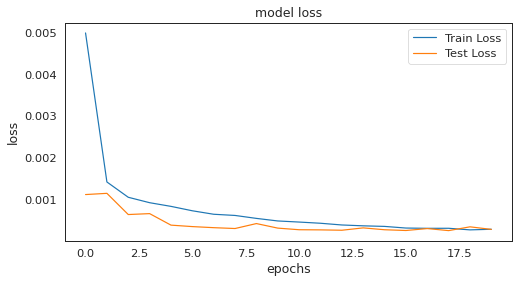

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

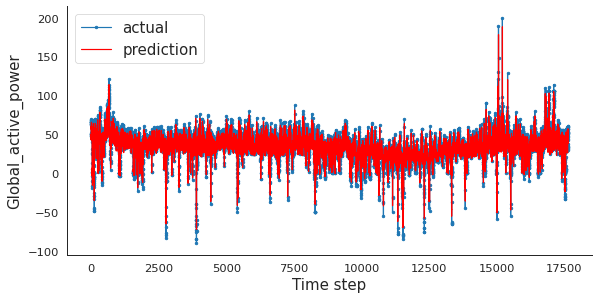

In [ ]:
aa=[x for x in range(17640)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:17640], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:17640], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
Y_test1=pd.DataFrame(Y_test).T
print(Y_test1)

            0
0     50.0400
1     50.0000
2     49.1900
3     48.5100
4     48.0700
...       ...
17635 59.4700
17636 56.7000
17637 52.4400
17638 51.8600
17639 52.2600

[17640 rows x 1 columns]


In [ ]:
pred=pd.DataFrame(test_predict)
print(pred)

            0
0     49.9540
1     43.2125
2     43.1174
3     43.8246
4     44.0314
...       ...
17635 56.0468
17636 53.2851
17637 50.5384
17638 46.2669
17639 45.5303

[17640 rows x 1 columns]


In [ ]:
X_train.shape

(34918, 1, 24)

In [ ]:
import csv
pred=pd.DataFrame(pred)
pred.to_csv("LSTM_PRED.csv", quoting=csv.QUOTE_NONE, escapechar=' ')